In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
#reading ACT maps
map_act_D56 = hp.read_map('../../fits/HSC_ACT/lensing_kappa_maps/hp_act_planck_dr4.01_s14s15_D56_lensing_kappa_baseline_nside2048.fits')
map_act_BN = hp.read_map('../../fits/HSC_ACT/lensing_kappa_maps/hp_act_planck_dr4.01_s14s15_BN_lensing_kappa_baseline_nside2048.fits')
mask_act_D56 = hp.read_map('../../fits/HSC_ACT/lensing_masks/hp_act_dr4.01_s14s15_D56_lensing_mask_nside2048.fits')
mask_act_BN = hp.read_map('../../fits/HSC_ACT/lensing_masks/hp_act_dr4.01_s14s15_BN_lensing_mask_nside2048.fits')

In [3]:
#reading PR4 maps
map_PR4 = hp.read_map('../../data/planckPR4/PR4_variations/map.fits')
mask_PR4 = hp.read_map('../../data/planckPR4/PR4_variations/mask.fits')
nside = 2048
map_PR4 = hp.ud_grade(map_PR4,nside_out=nside)
mask_PR4 = hp.ud_grade(mask_PR4,nside_out=nside)

In [4]:
#rotator btw celestial and galactic
def change_coord(m, coord):

    # Basic HEALPix parameters                                                            
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation                                                
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates                                                             
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

In [5]:
#rotation G to C 
#map_PR4 = change_coord(map_PR4,['G','C'])
#mask_PR4 = change_coord(mask_PR4,['G','C'])

In [6]:
# configurations
lmax = 2000
lmin_D56 = np.ceil(1./(2.*np.mean(mask_act_D56)))
lmin_BN = np.ceil(1./(2.*np.mean(mask_act_BN)))
print('lmin_D56 = %f,lmin_BN = %f'%(lmin_D56,lmin_BN))

lmin_D56 = 42.000000,lmin_BN = 13.000000


In [7]:
#measurements
cl_act_D56 = hp.anafast(map_act_D56*mask_act_D56,map_act_D56*mask_act_D56)
cl_act_BN = hp.anafast(map_act_BN*mask_act_BN,map_act_BN*mask_act_BN)
cl_PR4 = hp.anafast(map_PR4*mask_PR4,map_PR4*mask_PR4)
ell_act_D56 = np.arange(len(cl_act_D56))
ell_act_BN = np.arange(len(cl_act_BN))
ell_PR4 = np.arange(len(cl_PR4))

In [8]:
# map renormalisations
fsky_D56 = np.mean(mask_act_D56)
fsky_BN = np.mean(mask_act_BN)
fsky_PR4 = np.mean(mask_PR4)
print(fsky_D56,fsky_BN,fsky_PR4)
cl_act_D56 = cl_act_D56/fsky_D56
cl_act_BN = cl_act_BN/fsky_BN
cl_PR4 = cl_PR4/fsky_PR4

0.012169853506018957 0.04162511312347254 0.6701701084772745


In [9]:
'''
#noise correction of PR4
nlkk = np.loadtxt('../../data/planck2018/MV/nlkk.dat')[:,1]
cl_PR4 = cl_PR4[:lmax] - nlkk[:lmax]
ell_PR4 = ell_PR4[:lmax]
plt.plot(ell_PR4,cl_PR4)
plt.show()
'''

"\n#noise correction of PR4\nnlkk = np.loadtxt('../../data/planck2018/MV/nlkk.dat')[:,1]\ncl_PR4 = cl_PR4[:lmax] - nlkk[:lmax]\nell_PR4 = ell_PR4[:lmax]\nplt.plot(ell_PR4,cl_PR4)\nplt.show()\n"

In [10]:
#binning
# Bin the resulting spectra as well as the ell values
bins = np.linspace(50, 2000, 20)
digitized_act_D56 = np.digitize(ell_act_D56, bins)
digitized_act_BN = np.digitize(ell_act_BN, bins)
digitized_PR4 = np.digitize(ell_PR4, bins)
cl_act_D56_binned  = [cl_act_D56[digitized_act_D56 == i].mean() for i in range(1, len(bins))]
ell_act_D56_binned = [ell_act_D56[digitized_act_D56 == i].mean() for i in range(1, len(bins))]
cl_act_BN_binned  = [cl_act_BN[digitized_act_BN == i].mean() for i in range(1, len(bins))]
ell_act_BN_binned = [ell_act_BN[digitized_act_BN == i].mean() for i in range(1, len(bins))]
cl_PR4_binned  = [cl_PR4[digitized_PR4 == i].mean() for i in range(1, len(bins))]
ell_PR4_binned = [ell_PR4[digitized_PR4 == i].mean() for i in range(1, len(bins))]

In [11]:
'''
#computation of a theory
import theory as th
import numpy as np
ell = np.arange(3000)
cl = th.get_clkk(ell)
'''

'\n#computation of a theory\nimport theory as th\nimport numpy as np\nell = np.arange(3000)\ncl = th.get_clkk(ell)\n'

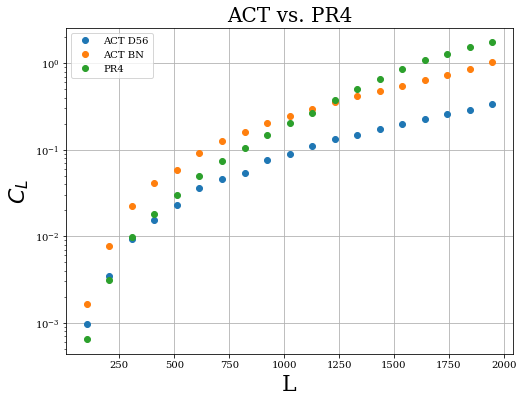

In [12]:
# Now plot the quick powerspectrum we just made
plt.figure(figsize = (8,6))
plt.rc('font', family='serif')
#plt.plot(ell_binned,cl_binned,marker="o",ls="none")
#plt.plot(ell,ell*(ell+np.ones(len(ell)))*cl,ls='solid',color='red',label='theory')
plt.plot(ell_act_D56_binned,(ell_act_D56_binned)*(ell_act_D56_binned+np.ones(len(ell_act_D56_binned)))*cl_act_D56_binned/(2.*np.pi),marker="o",ls="none",label='ACT D56')
plt.plot(ell_act_BN_binned,(ell_act_BN_binned)*(ell_act_BN_binned+np.ones(len(ell_act_BN_binned)))*cl_act_BN_binned/(2.*np.pi),marker="o",ls="none",label='ACT BN')
plt.plot(ell_PR4_binned,(ell_PR4_binned)*(ell_PR4_binned+np.ones(len(ell_PR4_binned)))*cl_PR4_binned/(2.*np.pi),marker="o",ls="none",label='PR4')
#plt.plot(ell_act_D56_binned,cl_act_D56_binned,marker="o",ls="none",label='ACT D56')
#plt.plot(ell_act_BN_binned,cl_act_BN_binned,marker="o",ls="none",label='ACT BN')
plt.yscale('log')
plt.xlabel('L', fontsize = 22)
plt.ylabel('$C_{L}$', fontsize = 22)
#plt.title("CMASS Galaxies x ACT Lensing Map", fontsize = 20)
plt.title("ACT vs. PR4", fontsize = 20)
plt.grid(True)
plt.legend()
plt.show()